In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/outlineddataset/outliners.csv


In [2]:
# THIS DATASET HAS TAKEN CARE OF OUTLIERS AND MISSING VALUES 
dataset=pd.read_csv('/kaggle/input/outlineddataset/outliners.csv')

In [3]:
dataset

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,EDFC78B07BA2908B3395C4EB2304665E,1,2.900,3.420,3.810,4.580,3.560,4.25,3.860,3.530,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
1,6BCFD78138BC72A9BA1BFB0B79382192,1,1.505,1.975,2.130,2.545,2.440,2.48,1.990,2.025,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
2,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.110,0.530,0.450,0.510,1.320,0.71,0.120,0.520,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
3,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.910,0.860,1.100,0.660,5.820,3.17,1.180,4.050,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
4,D0A186208CE83FBCCF730857C9A75B6F,1,5.965,4.550,4.520,4.290,7.065,5.28,4.725,6.050,...,3.36,3.41,4.73,3.54,4.20,2.77,3.02,4.06,4.75,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42363,F1472871E1AFF49D4289564B6377D76C,0,1.350,2.195,1.975,0.000,0.000,0.00,0.000,0.000,...,4.25,3.56,3.38,4.39,3.72,3.77,3.96,3.64,3.40,4.38
42364,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.700,4.390,3.950,0.000,0.000,0.00,0.000,0.000,...,4.81,4.87,4.48,3.67,3.31,4.58,3.33,3.19,4.57,4.00
42365,A9A0FE83467A680FBFB0DBFC910DF227,0,0.580,0.840,1.610,0.900,0.600,0.82,0.890,0.030,...,12.97,0.66,2.92,2.36,3.86,4.28,3.37,6.67,2.44,1.15
42366,D9A6ADA018FA46A55D5438370456AA45,0,16.890,13.840,13.500,14.600,14.460,12.34,15.370,17.010,...,21.13,13.75,22.61,18.83,25.52,18.11,19.31,17.48,17.20,15.28


In [4]:
dataset.shape

(42368, 1036)

In [5]:
# SEPARATING DEPENDENT AND INDEPENDENT VARIABLES
x = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (42368, 1034)
Shape of y: (42368,)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


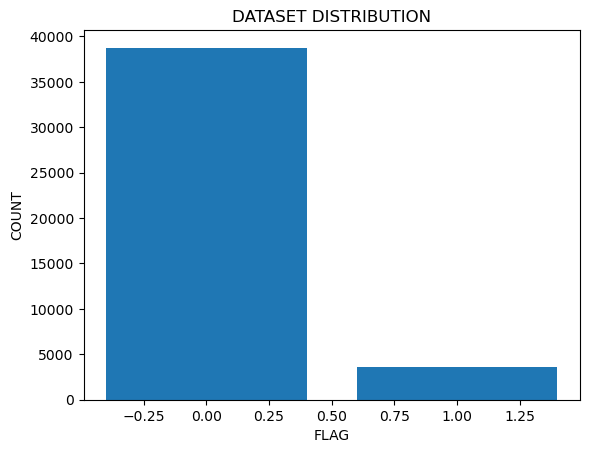

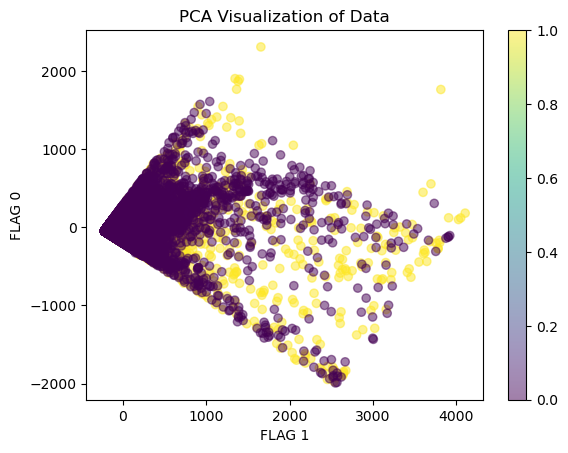

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have your data in x and labels in y

# Plotting the distribution of classes in y
unique_classes, class_counts = np.unique(y, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('FLAG')
plt.ylabel('COUNT')
plt.title('DATASET DISTRIBUTION')
plt.show()

# Performing PCA to reduce the dimensionality of x for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Plotting the reduced x in 2D
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('FLAG 1')
plt.ylabel('FLAG 0')
plt.title('PCA Visualization of Data')
plt.colorbar()
plt.show()


In [7]:
unique,count=np.unique(y,return_counts=True)
y_dist_val_cnt={k:v for (k,v) in zip(unique,count)}
y_dist_val_cnt

{0: 38757, 1: 3611}

In [8]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
# OVERSAMPLING AND BALANCING THE DATASET
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def smote_with_undersampling(X, y, ratio=1.0):
    # Count of number of samples in each class
    class_counts = Counter(y)

    # Determining the class with fewer samples
    minority_class = min(class_counts, key=class_counts.get)
    majority_class = max(class_counts, key=class_counts.get)

    # Creating SMOTE and Undersampler instances with the specified ratio
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    undersampler = RandomUnderSampler(sampling_strategy=ratio, random_state=42)

    # Applying SMOTE to create synthetic samples for the minority class
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Applying undersampling to reduce the number of samples in the majority class
    X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

    # Counting the number of samples in each class in the final resampled dataset
    final_class_counts = Counter(y_resampled)

    return X_resampled, y_resampled, final_class_counts

desired_ratio = 1.0
x_resampled, y_resampled, final_class_counts = smote_with_undersampling(x, y, ratio=desired_ratio)

# The final_class_counts will now contain equal numbers of samples for both classes
print("Final class counts:", final_class_counts)


Final class counts: Counter({0: 38757, 1: 38757})


In [11]:
unique,count=np.unique(y,return_counts=True)
y_dist_val_cnt={k:v for (k,v) in zip(unique,count)}
y_dist_val_cnt

{0: 38757, 1: 3611}

In [12]:
# SPLITTING THE DATASET INTO TEST SET AND TRAINING SET
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
x_train 

array([[14.83      ,  0.        ,  9.23      , ...,  6.48      ,
         6.47      ,  7.31      ],
       [13.36      , 13.79      , 12.1       , ..., 16.77      ,
        14.83      , 14.33      ],
       [42.255     , 77.07813337, 75.5473664 , ...,  4.27      ,
         4.82      ,  7.27      ],
       ...,
       [ 4.44203902,  5.32750507,  3.95076715, ..., 13.73591275,
        13.80173798, 15.49478655],
       [ 1.895     ,  2.865     ,  2.505     , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.1       ,  0.        , ...,  2.47      ,
         1.25      ,  1.34      ]])

In [14]:
x_test

array([[12.15567845, 10.50703536, 18.22330309, ..., 18.40826536,
        18.7675431 , 16.77617712],
       [39.13      , 46.57      , 51.23      , ..., 24.82      ,
        15.16      , 28.16      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.97319778,  3.78345185,  3.20424691, ..., 14.09356939,
        12.33429655, 13.2272242 ],
       [ 0.        ,  0.        ,  0.        , ...,  5.53      ,
         5.14      ,  7.15      ],
       [ 7.51      ,  5.415     ,  9.71      , ...,  6.19      ,
         5.68      ,  6.2       ]])

In [15]:
# TLGRU MODEL IN WHICH LSTM IS USED AS A FEATURE EXTRACTOR AND GRU FOR HANDLING VANISHING GRADIENTS PROBLEM

import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, LeakyReLU, BatchNormalization, Dropout, Flatten, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

# LSTM feature extractor
def create_lstm_feature_extractor(inputs):
    x = LSTM(units=200, return_sequences=True)(inputs)
    x = LeakyReLU(alpha=0.001)(x)
    x = LSTM(units=200, return_sequences=True)(inputs)
    x = LeakyReLU(alpha=0.001)(x)
    x = LSTM(units=100, return_sequences=True)(x)
    x = LeakyReLU(alpha=0.001)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    return x

# Model
def create_tlgru_model(timesteps, features):
    # Defining input layer
    inputs = Input(shape=(timesteps, features))
    
    # LSTM feature extractor
    x = create_lstm_feature_extractor(inputs)
    
    # Applying LSTM feature extractor to each time step independently
    x = TimeDistributed(Dense(units=1))(x)
    
    # GRU layer
    x = GRU(units=50, return_sequences=True)(x)
    x = GRU(units=50, return_sequences=True)(x)
    
    
    # Flatten layer
    x = Flatten()(x)
    
    # Dropout layer
    x = Dropout(0.2)(x)
    
    # Fully connected layer (Dense layer)
    outputs = Dense(units=1)(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

timesteps = 50
features = 1034

rnn = create_tlgru_model(timesteps, features)
rnn.summary()


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1034)]        0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 200)           988000    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 100)           120400    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 50, 100)           0         
                                                                 
 batch_normalization (BatchN  (None, 50, 100)          400       
 ormalization)                                                   
                                                             

In [16]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.optimizers import Adam

# Reshape x_train
x_train  = np.reshape(x_train , (x_train .shape[0],x_train .shape[1], 1))

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Reshape y_train
y_train  = np.reshape(y_train , (y_train.shape[0], 1))

# Reshape y_test
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [17]:

# TLGRU model
rnn = create_tlgru_model(x_train.shape[1], 1)

# Compile 
optimizer = Adam(learning_rate=0.001) 
rnn.compile(optimizer=optimizer, loss='mse')

batch_size =32 
epochs = 50

history=rnn.fit(x_train , y_train , batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))



Epoch 1/50
1938/1938 [==============================] - 298s 146ms/step - loss: 0.1914 - val_loss: 0.1562
Epoch 2/50
1938/1938 [==============================] - 283s 146ms/step - loss: 0.1283 - val_loss: 0.1123
Epoch 3/50
1938/1938 [==============================] - 283s 146ms/step - loss: 0.1003 - val_loss: 0.1012
Epoch 4/50
1938/1938 [==============================] - 279s 144ms/step - loss: 0.0871 - val_loss: 0.0808
Epoch 5/50
1938/1938 [==============================] - 279s 144ms/step - loss: 0.0785 - val_loss: 0.0851
Epoch 6/50
1938/1938 [==============================] - 279s 144ms/step - loss: 0.0707 - val_loss: 0.0714
Epoch 7/50
1938/1938 [==============================] - 292s 151ms/step - loss: 0.0659 - val_loss: 0.0666
Epoch 8/50
1938/1938 [==============================] - 279s 144ms/step - loss: 0.0615 - val_loss: 0.0771
Epoch 9/50
1938/1938 [==============================] - 278s 144ms/step - loss: 0.0576 - val_loss: 0.0636
Epoch 10/50
1938/1938 [=======================

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
loss = rnn.evaluate(x_test, y_test)
print("Test Loss:", loss)

y_pred = rnn.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_binary = np.where(y_pred_classes > 0.5, 1, 0)  # binary predictions

y_test_binary = np.where(y_test > 0.5, 1, 0)  # binary labels

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# confusion matrix
confusion_mat = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)


485/485 [==============================] - 29s 60ms/step - loss: 0.0338
Test Loss: 0.03377832472324371
485/485 [==============================] - 28s 58ms/step
Accuracy: 0.9814874540411533
Confusion Matrix:
[[7466  204]
 [  83 7750]]


In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix
y_pred = rnn.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_binary = np.where(y_pred_classes > 0.5, 1, 0)  # Convert to binary predictions

y_test_binary = np.where(y_test > 0.5, 1, 0)  # Convert to binary labels

# accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# precision
precision = precision_score(y_test_binary, y_pred_binary)
print("Precision:", precision)

# F1 score
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_binary, y_pred_binary)
print("MCC Score:", mcc)

# confusion matrix
confusion_mat = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)


485/485 [==============================] - 28s 58ms/step
Accuracy: 0.9814874540411533
Precision: 0.974352527030425
F1 Score: 0.9818204852093494
MCC Score: 0.9630821435986652
Confusion Matrix:
[[7466  204]
 [  83 7750]]


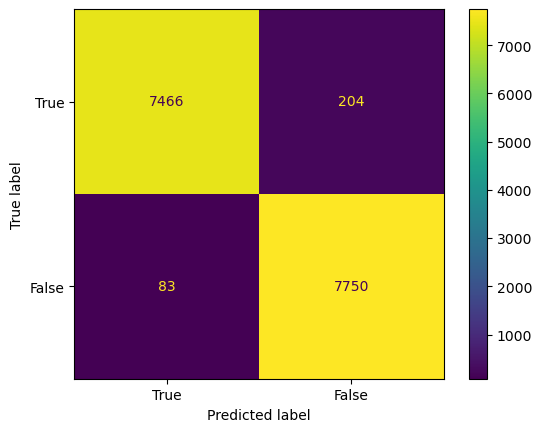

In [22]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_binary, y_pred_binary)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

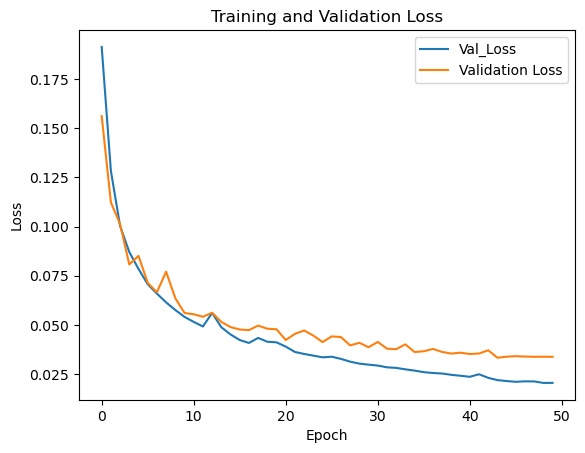

In [23]:
import matplotlib.pyplot as plt

# Ploting the training and validation loss
plt.plot(history.history['loss'], label='Val_Loss')
plt.plot(history.history['Training loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()